# Echoregions Regions2D Plotting and Masking Demonstration

This notebook demonstrates some of the functionalities of `echoregions` to read Echoview region `.evr` files and visualize regions.

In [1]:
# install echopype to read echousounder files
!pip install -q echopype==0.5.5

In [2]:
!pip install gdown

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import os
import numpy as np
import pandas as pd

In [4]:
import regionmask

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
import echoregions as er

In [7]:
# download an example file
!wget https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr -O x1.evr

--2022-12-11 19:51:41--  https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9349 (9.1K) [text/plain]
Saving to: ‘x1.evr’

x1.evr              100%[===================>]   9.13K  --.-KB/s    in 0.001s  

2022-12-11 19:51:41 (6.22 MB/s) - ‘x1.evr’ saved [9349/9349]



In [8]:
EVR_FILE = 'x1.evr'

### Get a Regions2D object with `read_evr`

In [9]:
r2d = er.read_evr(EVR_FILE)

/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method

## Plotting

In [10]:
# Display availible regions
r2d.data.region_id.values

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35]
Length: 33, dtype: Int64

In [11]:
# let's select one id
region_ids = [11]

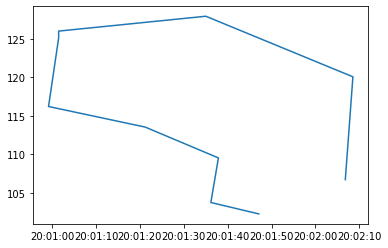

In [12]:
# Plot a region with a specific id with the `plot` function
r2d.plot(region_ids[0])

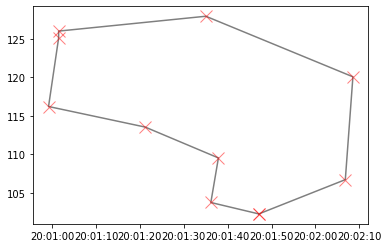

In [13]:
# Plot a closed region by using close_region=True.
# Optionally provide matplotlib kwargs for more customization.
r2d.plot(region_ids[0], close_region=True, color='k', alpha=.5, marker='x', markeredgecolor='red', markersize=12)

In [14]:
r2d.select_region(region_ids)

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,...,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
10,x1,EVRG,7,12.0.341.42620,11,13,10,0,2,-1,...,2017-06-25 20:02:08.535700,102.255201,127.947603,Unknown,1,Chicken nugget,"[2017-06-25T20:01:47.093000000, 2017-06-25T20:...","[102.2552007996, 103.7403107496, 109.532239554...",[],[]


## Plotting regions on an echogram

#### Reading Preprocessed Sonar Files

We have converted and calibrated the echosounder files corresponding to one transect and stored them in `.zarr`. We can directly read them with the `xarray` library. 

In [15]:
# mounting the google drive (uncomment if you have permission to read directly from Google Drive)
# from google.colab import drive
# drive.mount('/content/drive/') 

In [16]:
# Paths for Google Drive read  (uncomment if you have permission to read directly from Google Drive)
# ZARR_PATH = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/x1.zarr'

In [17]:
# download a zipped sample folder from publicly available Google Drive
import gdown

url = 'https://drive.google.com/uc?id=1OhYVcakCEgXEKA4R9za4jvBWQUFIOnE5'
output = 'x1.tar.gz'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1OhYVcakCEgXEKA4R9za4jvBWQUFIOnE5
To: /Users/valentina/projects/uw-echospace/echoregions/notebooks/x1.tar.gz
100%|████████████████████████████████████████| 655M/655M [00:16<00:00, 39.1MB/s]


'x1.tar.gz'

In [18]:
# unzip into a sample folder
!tar -xvzf  x1.tar.gz

x x1.zarr/
x x1.zarr/equivalent_beam_angle/
x x1.zarr/equivalent_beam_angle/0
x x1.zarr/equivalent_beam_angle/.zattrs
x x1.zarr/equivalent_beam_angle/.zarray
x x1.zarr/ping_time/
x x1.zarr/ping_time/0
x x1.zarr/ping_time/8
x x1.zarr/ping_time/17
x x1.zarr/ping_time/22
x x1.zarr/ping_time/4
x x1.zarr/ping_time/13
x x1.zarr/ping_time/20
x x1.zarr/ping_time/2
x x1.zarr/ping_time/11
x x1.zarr/ping_time/19
x x1.zarr/ping_time/24
x x1.zarr/ping_time/.zattrs
x x1.zarr/ping_time/6
x x1.zarr/ping_time/15
x x1.zarr/ping_time/1
x x1.zarr/ping_time/10
x x1.zarr/ping_time/9
x x1.zarr/ping_time/18
x x1.zarr/ping_time/23
x x1.zarr/ping_time/5
x x1.zarr/ping_time/14
x x1.zarr/ping_time/21
x x1.zarr/ping_time/3
x x1.zarr/ping_time/12
x x1.zarr/ping_time/25
x x1.zarr/ping_time/.zarray
x x1.zarr/ping_time/7
x x1.zarr/ping_time/16
x x1.zarr/water_level/
x x1.zarr/water_level/0.20
x x1.zarr/water_level/0.11
x x1.zarr/water_level/0.2
x x1.zarr/water_level/0.19
x x1.zarr/water_level/0.24
x x1.zarr/water_leve

In [21]:
ds = xr.open_dataset("x1.zarr")

/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [22]:
ds

<xarray.Dataset>
Dimensions:                (channel: 3, ping_time: 13192, range_sample: 3957)
Coordinates:
  * channel                (channel) object 'GPT  18 kHz 009072058c8d 1-1 ES1...
  * ping_time              (ping_time) datetime64[ns] 2017-06-25T15:04:30.076...
  * range_sample           (range_sample) int64 0 1 2 3 ... 3953 3954 3955 3956
Data variables: (12/13)
    Sv                     (channel, ping_time, range_sample) float64 ...
    depth                  (channel, ping_time, range_sample) float64 ...
    echo_range             (channel, ping_time, range_sample) float64 ...
    equivalent_beam_angle  (channel) float64 ...
    frequency_nominal      (channel) float64 ...
    gain_correction        (channel) float64 ...
    ...                     ...
    sa_correction          (channel) float64 ...
    salinity               float64 ...
    sound_absorption       (channel, ping_time) float64 ...
    sound_speed            (channel, ping_time) float64 ...
    temperature            float64 ...
    water_level            (channel, ping_time) float64 ...

The dataset has a `range_sample` dimension and instead we convert it to a `depth` dimension by adjusting the water level.

In [23]:
# create depth coordinate:
echo_range = ds.echo_range.isel(channel=0, ping_time=0)
# assuming water levels are same for different frequencies and location_time
depth = ds.water_level.isel(channel=0, ping_time=0) + echo_range
depth = depth.drop_vars('channel')
# creating a new depth dimension
ds['depth'] = depth
ds = ds.swap_dims({'range_sample': 'depth'})

In [24]:
ds

<xarray.Dataset>
Dimensions:                (channel: 3, ping_time: 13192, depth: 3957)
Coordinates:
  * channel                (channel) object 'GPT  18 kHz 009072058c8d 1-1 ES1...
  * depth                  (depth) float64 9.15 9.15 9.15 ... 758.1 758.3 758.5
  * ping_time              (ping_time) datetime64[ns] 2017-06-25T15:04:30.076...
    range_sample           (depth) int64 0 1 2 3 4 ... 3952 3953 3954 3955 3956
Data variables:
    Sv                     (channel, ping_time, depth) float64 ...
    echo_range             (channel, ping_time, depth) float64 ...
    equivalent_beam_angle  (channel) float64 -17.37 -21.01 -20.47
    frequency_nominal      (channel) float64 1.8e+04 3.8e+04 1.2e+05
    gain_correction        (channel) float64 22.95 26.07 26.55
    pressure               float64 nan
    sa_correction          (channel) float64 -0.7 -0.52 -0.3
    salinity               float64 nan
    sound_absorption       (channel, ping_time) float64 0.002822 ... 0.03259
    sound_speed            (channel, ping_time) float64 1.481e+03 ... 1.481e+03
    temperature            float64 nan
    water_level            (channel, ping_time) float64 9.15 9.15 ... 9.15 9.15

In [25]:
# set the min and max depth based on the sonar files
r2d.min_depth = ds.depth.min()
r2d.max_depth = ds.depth.max()

In [26]:
r2d.select_region(region_ids[0])

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,...,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
10,x1,EVRG,7,12.0.341.42620,11,13,10,0,2,-1,...,2017-06-25 20:02:08.535700,102.255201,127.947603,Unknown,1,Chicken nugget,"[2017-06-25T20:01:47.093000000, 2017-06-25T20:...","[102.2552007996, 103.7403107496, 109.532239554...",[],[]


In [27]:
region_df = r2d.select_region(region_ids)

In [28]:
region_df

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,...,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
10,x1,EVRG,7,12.0.341.42620,11,13,10,0,2,-1,...,2017-06-25 20:02:08.535700,102.255201,127.947603,Unknown,1,Chicken nugget,"[2017-06-25T20:01:47.093000000, 2017-06-25T20:...","[102.2552007996, 103.7403107496, 109.532239554...",[],[]


In [29]:
region_ids

[11]

In [30]:
M = r2d.mask(ds.Sv.isel(channel=0).drop('channel'), region_ids, mask_var="ROI")

In [31]:
# the mask has nan's where outside of the region
M.shape

(3957, 13192)

In [32]:
# the region is labeled by default with 0 (if there are more regions they will be labeled 1,2,3,...)
M.max()

<xarray.DataArray 'ROI' ()>
array(0.)

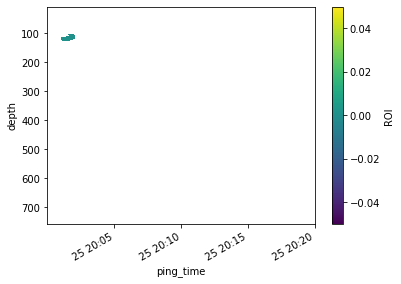

In [33]:
# M.plot(yincrease=False)
# r2d.plot(region_ids, close_region=True, color='r')
M.sel(ping_time=slice('2017-06-25T20:00:00', '2017-06-25T20:20:00')).plot(yincrease=False)

We can also create a masked sonar file:

In [34]:
Sv_masked = ds.Sv.where(~M.isnull())

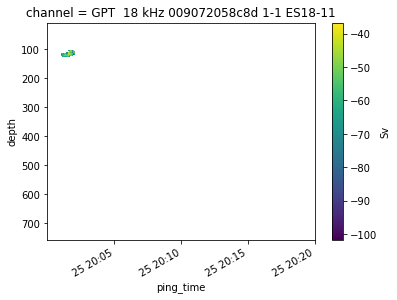

In [35]:
# we limit the time range so that we see the small region
Sv_masked.sel(ping_time=slice('2017-06-25T20:00:00', '2017-06-25T20:20:00')).isel(channel=0).T.plot(yincrease=False)

#### Multiple Region Mask

The `mask` function can make a mask for several regions simultaneously:

In [36]:
region_ids = [10, 11]

In [37]:
r2d.select_region(region_ids)

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,...,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
9,x1,EVRG,7,12.0.341.42620,10,13,4,0,4,-1,...,2017-06-25 19:13:12.607500,9.244758,758.973217,Side station,0,Region10,"[2017-06-25T17:57:09.687500000, 2017-06-25T17:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
10,x1,EVRG,7,12.0.341.42620,11,13,10,0,2,-1,...,2017-06-25 20:02:08.535700,102.255201,127.947603,Unknown,1,Chicken nugget,"[2017-06-25T20:01:47.093000000, 2017-06-25T20:...","[102.2552007996, 103.7403107496, 109.532239554...",[],[]


In [38]:
r2d.data['time'][10].min()

numpy.datetime64('2017-06-25T20:00:59.180700000')

In [39]:
r2d.data['time'][10].max()

numpy.datetime64('2017-06-25T20:02:08.535700000')

In [40]:
M = r2d.mask(ds.Sv.isel(channel=0).drop('channel'), region_ids, mask_var="ROI")

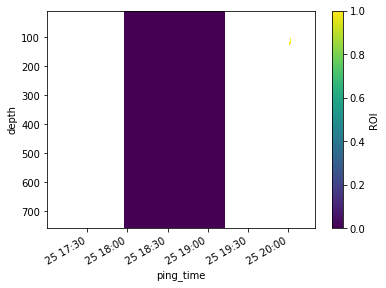

In [41]:
# select range so that we see the regions
M.sel(ping_time=slice('2017-06-25T17:00:00', '2017-06-25T20:20:00')).plot(yincrease=False)

In [42]:
# now the mask has labeled the regions 0 and 1, and rest is nan
np.unique(M.data)

array([ 0.,  1., nan])

If one wants to label the regions with explicit values they can pass them through the `mask_labels` variable as a list of integers.

In [43]:
M = r2d.mask(ds.Sv.isel(channel=0).drop('channel'), region_ids, mask_var="ROI", mask_labels=[1, 1])

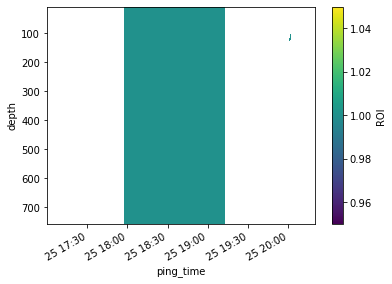

In [44]:
# select range so that we see the regions
M.sel(ping_time=slice('2017-06-25T17:00:00', '2017-06-25T20:20:00')).plot(yincrease=False)


Alternatively, one could use the default ids from the `.evr` files.

In [45]:
M = r2d.mask(ds.Sv.isel(channel=0).drop('channel'), region_ids, mask_var="ROI", mask_labels="from_ids")

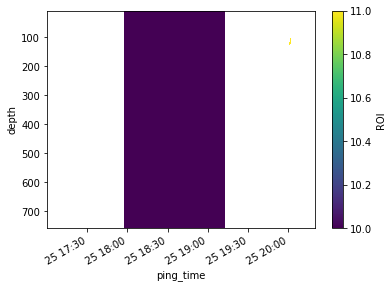

In [46]:
# select range so that we see the regions
M.sel(ping_time=slice('2017-06-25T17:00:00', '2017-06-25T20:20:00')).plot(yincrease=False)